# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from si.data.Dataset import Dataset
from si.util.Util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size = None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding = 'bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size], y_train[:sample_size]), Dataset(x_test, y_test)
    else:
        return Dataset(x_train, y_train), Dataset(x_test, y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.y)

In [5]:
preprocess(train)
preprocess(test)

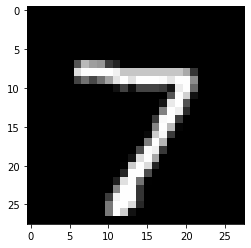

In [6]:
def plot_img(img,shape = (28, 28)):
    pic = (img * 255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap = pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised.NeuralNetwork import NN, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from si.util.Metrics import cross_entropy, cross_entropy_prime
from si.util.Activation import Tanh, Sigmoid

### Check Conv2D

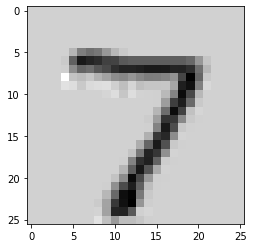

In [8]:
conv = Conv2D((28, 28,1), (3, 3), 1)
out = conv.forward(test.X[:1])
plot_img(out, shape = (26, 26))

### Check MaxPooling

(4, 729)


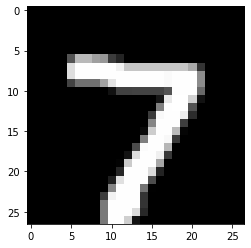

In [9]:
pool = MaxPooling2D(size = 2, stride = 1)
out = pool.forward(test.X[:1])
plot_img(out, shape = (27, 27))

Build the model

In [10]:
net = NN(epochs = 2000, lr = 0.1, verbose = False)
net.add(Conv2D((28, 28, 1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(MaxPooling2D())
net.add(Flatten())
net.add(Dense(25 * 25 * 1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

net.useLoss(cross_entropy, cross_entropy_prime)

Train the model

In [ ]:
net.fit(train)

(4, 312500)
(4, 312500)0, error= 428.64221406559136
(4, 312500)0, error= 8952.361913512039
(4, 312500)0, error= 8922.65253555252
(4, 312500)0, error= 8896.37530974318
(4, 312500)0, error= 8872.83724317254
(4, 312500)0, error= 8851.545893341288
(4, 312500)0, error= 8832.126806353948
(4, 312500)0, error= 8814.275574972435
(4, 312500)0, error= 8797.731844838785
(4, 312500)00, error= 8782.265543705205
(4, 312500)00, error= 8767.669116188525
(4, 312500)00, error= 8753.752301347413
(4, 312500)00, error= 8740.3377996573
(4, 312500)00, error= 8727.257290996014
(4, 312500)00, error= 8714.348140427468
(4, 312500)00, error= 8701.452532242987
(4, 312500)00, error= 8688.42462623788
(4, 312500)00, error= 8675.16418265215
(4, 312500)00, error= 8661.74409259143
(4, 312500)00, error= 8648.921211202667
(4, 312500)00, error= 8640.605465858305
(4, 312500)00, error= 8660.088267893072
(4, 312500)00, error= 8810.411854882179
(4, 312500)00, error= 8738.853374410199
(4, 312500)00, error= 8738.466846710566
(4, 

(4, 312500)000, error= 31073.75841753097
(4, 312500)000, error= 31073.75836001575
(4, 312500)000, error= 31073.758302500475
(4, 312500)000, error= 31073.758244985154
(4, 312500)000, error= 31073.758187469775
(4, 312500)000, error= 31073.758129954345
(4, 312500)000, error= 31073.758072438868
(4, 312500)000, error= 31073.75801492334
(4, 312500)000, error= 31073.757957407754
(4, 312500)000, error= 31073.757899892116
(4, 312500)000, error= 31073.757842376428
(4, 312500)000, error= 31073.75778486069
(4, 312500)000, error= 31073.757727344902
(4, 312500)000, error= 31073.757669829058
(4, 312500)000, error= 31073.75761231316
(4, 312500)000, error= 31073.757554797212
(4, 312500)000, error= 31073.757497281214
(4, 312500)000, error= 31073.75743976517
(4, 312500)000, error= 31073.757382249063
(4, 312500)000, error= 31073.757324732906
(4, 312500)000, error= 31073.7572672167
(4, 312500)000, error= 31073.757209700445
(4, 312500)000, error= 31073.757152184135
(4, 312500)000, error= 31073.757094667766


(4, 312500)000, error= 31073.74708603022
(4, 312500)000, error= 31073.747028504775
(4, 312500)000, error= 31073.746970979268
(4, 312500)000, error= 31073.746913453717
(4, 312500)000, error= 31073.74685592811
(4, 312500)000, error= 31073.746798402455
(4, 312500)000, error= 31073.74674087674
(4, 312500)000, error= 31073.746683350982
(4, 312500)000, error= 31073.746625825173
(4, 312500)000, error= 31073.746568299302
(4, 312500)000, error= 31073.746510773388
(4, 312500)000, error= 31073.74645324742
(4, 312500)000, error= 31073.7463957214
(4, 312500)000, error= 31073.746338195328
(4, 312500)000, error= 31073.746280669202
(4, 312500)000, error= 31073.746223143025
(4, 312500)000, error= 31073.746165616794
(4, 312500)000, error= 31073.746108090516
(4, 312500)000, error= 31073.746050564183
(4, 312500)000, error= 31073.7459930378
(4, 312500)000, error= 31073.74593551136
(4, 312500)000, error= 31073.745877984875
(4, 312500)000, error= 31073.745820458334
(4, 312500)000, error= 31073.745762931743
(

(4, 312500)000, error= 31073.73569497821
(4, 312500)000, error= 31073.735637442478
(4, 312500)000, error= 31073.735579906694
(4, 312500)000, error= 31073.73552237085
(4, 312500)000, error= 31073.73546483496
(4, 312500)000, error= 31073.73540729902
(4, 312500)000, error= 31073.735349763025
(4, 312500)000, error= 31073.73529222698
(4, 312500)000, error= 31073.73523469088
(4, 312500)000, error= 31073.735177154726
(4, 312500)000, error= 31073.73511961853
(4, 312500)000, error= 31073.735062082276
(4, 312500)000, error= 31073.735004545964
(4, 312500)000, error= 31073.73494700961
(4, 312500)000, error= 31073.7348894732
(4, 312500)000, error= 31073.734831936737
(4, 312500)000, error= 31073.734774400218
(4, 312500)000, error= 31073.73471686365
(4, 312500)000, error= 31073.734659327034
(4, 312500)000, error= 31073.73460179037
(4, 312500)000, error= 31073.734544253646
(4, 312500)000, error= 31073.734486716872
(4, 312500)000, error= 31073.734429180044
(4, 312500)000, error= 31073.73437164317
(4, 3

(4, 312500)000, error= 31073.72430188921
(4, 312500)000, error= 31073.724244343186
(4, 312500)000, error= 31073.72418679711
(4, 312500)000, error= 31073.724129250986
(4, 312500)000, error= 31073.7240717048
(4, 312500)000, error= 31073.724014158568
(4, 312500)000, error= 31073.723956612284
(4, 312500)000, error= 31073.723899065946
(4, 312500)000, error= 31073.72384151956
(4, 312500)000, error= 31073.723783973117
(4, 312500)000, error= 31073.723726426626
(4, 312500)000, error= 31073.723668880084
(4, 312500)000, error= 31073.723611333484
(4, 312500)000, error= 31073.72355378684
(4, 312500)000, error= 31073.723496240134
(4, 312500)000, error= 31073.723438693385
(4, 312500)000, error= 31073.723381146578
(4, 312500)000, error= 31073.723323599723
(4, 312500)000, error= 31073.723266052817
(4, 312500)000, error= 31073.723208505853
(4, 312500)000, error= 31073.72315095884
(4, 312500)000, error= 31073.723093411776
(4, 312500)000, error= 31073.72303586466
(4, 312500)000, error= 31073.72297831749
(

(4, 312500)000, error= 31073.712906762357
(4, 312500)000, error= 31073.71284920604
(4, 312500)000, error= 31073.71279164967
(4, 312500)000, error= 31073.712734093246
(4, 312500)000, error= 31073.712676536772
(4, 312500)000, error= 31073.712618980244
(4, 312500)000, error= 31073.712561423665
(4, 312500)000, error= 31073.712503867035
(4, 312500)2000, error= 31073.712446310354
(4, 312500)2000, error= 31073.712388753615
(4, 312500)2000, error= 31073.71233119683
(4, 312500)2000, error= 31073.71227363999
(4, 312500)2000, error= 31073.712216083095
(4, 312500)2000, error= 31073.712158526156
(4, 312500)2000, error= 31073.712100969162
(4, 312500)2000, error= 31073.71204341211
(4, 312500)2000, error= 31073.71198585501
(4, 312500)2000, error= 31073.71192829786
(4, 312500)2000, error= 31073.71187074066
(4, 312500)2000, error= 31073.7118131834
(4, 312500)2000, error= 31073.711755626096
(4, 312500)2000, error= 31073.71169806874
(4, 312500)2000, error= 31073.711640511327
(4, 312500)2000, error= 31073.

(4, 312500)2000, error= 31073.70179742911
(4, 312500)2000, error= 31073.70173986275
(4, 312500)2000, error= 31073.70168229634
(4, 312500)2000, error= 31073.701624729874
(4, 312500)2000, error= 31073.701567163364
(4, 312500)2000, error= 31073.701509596794
(4, 312500)2000, error= 31073.701452030182
(4, 312500)2000, error= 31073.701394463504
(4, 312500)2000, error= 31073.701336896786
(4, 312500)2000, error= 31073.701279330013
(4, 312500)2000, error= 31073.701221763193
(4, 312500)2000, error= 31073.701164196307
(4, 312500)2000, error= 31073.701106629378
(4, 312500)2000, error= 31073.701049062398
(4, 312500)2000, error= 31073.70099149536
(4, 312500)2000, error= 31073.700933928278
(4, 312500)2000, error= 31073.700876361137
(4, 312500)2000, error= 31073.700818793943
(4, 312500)2000, error= 31073.700761226704
(4, 312500)2000, error= 31073.700703659415
(4, 312500)2000, error= 31073.700646092064
(4, 312500)2000, error= 31073.70058852467
(4, 312500)2000, error= 31073.700530957212
(4, 312500)2000,

(4, 312500)2000, error= 31073.690686157974
(4, 312500)2000, error= 31073.690628581575
(4, 312500)2000, error= 31073.690571005118
(4, 312500)2000, error= 31073.690513428613
(4, 312500)2000, error= 31073.690455852062
(4, 312500)2000, error= 31073.690398275452
(4, 312500)2000, error= 31073.690340698788
(4, 312500)2000, error= 31073.690283122072
(4, 312500)2000, error= 31073.690225545306
(4, 312500)2000, error= 31073.69016796849
(4, 312500)2000, error= 31073.69011039162
(4, 312500)2000, error= 31073.6900528147
(4, 312500)2000, error= 31073.689995237728
(4, 312500)2000, error= 31073.6899376607
(4, 312500)2000, error= 31073.689880083624
(4, 312500)2000, error= 31073.689822506494
(4, 312500)2000, error= 31073.689764929317
(4, 312500)2000, error= 31073.689707352078
(4, 312500)2000, error= 31073.689649774795
(4, 312500)2000, error= 31073.689592197457
(4, 312500)2000, error= 31073.68953462007
(4, 312500)2000, error= 31073.689477042622
(4, 312500)2000, error= 31073.689419465132
(4, 312500)2000, e

(4, 312500)2000, error= 31073.679572948167
(4, 312500)2000, error= 31073.67951536172
(4, 312500)2000, error= 31073.679457775223
(4, 312500)2000, error= 31073.67940018867
(4, 312500)2000, error= 31073.679342602067
(4, 312500)2000, error= 31073.679285015412
(4, 312500)2000, error= 31073.6792274287
(4, 312500)2000, error= 31073.67916984194
(4, 312500)2000, error= 31073.67911225513
(4, 312500)2000, error= 31073.67905466826
(4, 312500)2000, error= 31073.678997081348
(4, 312500)2000, error= 31073.67893949438
(4, 312500)2000, error= 31073.678881907355
(4, 312500)2000, error= 31073.678824320286
(4, 312500)2000, error= 31073.67876673316
(4, 312500)2000, error= 31073.678709145985
(4, 312500)2000, error= 31073.678651558756
(4, 312500)2000, error= 31073.678593971472
(4, 312500)2000, error= 31073.67853638414
(4, 312500)2000, error= 31073.678478796755
(4, 312500)2000, error= 31073.67842120932
(4, 312500)2000, error= 31073.678363621828
(4, 312500)2000, error= 31073.678306034286
(4, 312500)2000, error

(4, 312500)2000, error= 31073.668457798878
(4, 312500)2000, error= 31073.66840020238
(4, 312500)2000, error= 31073.668342605833
(4, 312500)2000, error= 31073.668285009226
(4, 312500)2000, error= 31073.668227412567
(4, 312500)2000, error= 31073.668169815865
(4, 312500)2000, error= 31073.6681122191
(4, 312500)2000, error= 31073.668054622292
(4, 312500)2000, error= 31073.667997025426
(4, 312500)2000, error= 31073.667939428513
(4, 312500)2000, error= 31073.66788183154
(4, 312500)2000, error= 31073.667824234526
(4, 312500)2000, error= 31073.667766637453
(4, 312500)2000, error= 31073.66770904033
(4, 312500)2000, error= 31073.667651443153
(4, 312500)2000, error= 31073.667593845927
(4, 312500)2000, error= 31073.667536248642
(4, 312500)2000, error= 31073.66747865131
(4, 312500)2000, error= 31073.66742105392
(4, 312500)2000, error= 31073.66736345649
(4, 312500)2000, error= 31073.667305859
(4, 312500)2000, error= 31073.667248261456
(4, 312500)2000, error= 31073.667190663866
(4, 312500)2000, error

In [ ]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end = "\n")
print("true values : ")
print(test.y[0:3])

In [ ]:
conv1 = net.layers[0]
act1 = net.layers[1]
pool1 = net.layers[2]

In [ ]:
img1 = conv1.forward(test.X[:1])
plot_img(img1, shape = (26, 26))

In [ ]:
img2= pool1.forward(act1.forward(img1))
plot_img(img2, shape = (25, 25))